### Крок 0: Встановлення бібліотек `matplotlib` та `seaborn`

In [1]:
# Встановлення matplotlib
!pip install matplotlib

# Встановлення seaborn
!pip install seaborn

# Крок 1. Завантаження даних

In [2]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# Визначаємо абсолютний шлях до директорії, де знаходиться Jupyter Notebook
notebook_dir = os.path.dirname(os.path.abspath('steps.ipynb'))

# Задаємо шлях до файлу з даними відносно директорії Jupyter Notebook
file_path = os.path.join(notebook_dir, 'DataSet', 'financial_regression.csv') # Змінено назву файлу

# Завантажуємо дані в DataFrame
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Помилка: Файл '{file_path}' не знайдено.")
    exit()

# Виводимо перші 5 рядків даних
print("Перші 5 рядків даних:")
print(data.head())

# Виводимо загальну інформацію про набір даних
print("\nЗагальна інформація про набір даних:")
print(data.info())

# Виводимо описову статистику
print("\nОписова статистика:")
print(data.describe())

Перші 5 рядків даних:
         date  sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
0  2010-01-14      114.49      115.14     114.42       114.93   115646960.0   
1  2010-01-15      114.73      114.84     113.20       113.64   212252769.0   
2  2010-01-18         NaN         NaN        NaN          NaN           NaN   
3  2010-01-19      113.62      115.13     113.59       115.06   138671890.0   
4  2010-01-20      114.28      114.45     112.98       113.89   216330645.0   

   sp500 high-low  nasdaq open  nasdaq high  nasdaq low  ...  palladium high  \
0            0.72        46.26       46.520       46.22  ...           45.02   
1            1.64        46.46       46.550       45.65  ...           45.76   
2             NaN          NaN          NaN         NaN  ...             NaN   
3            1.54        45.96       46.640       45.95  ...           47.08   
4            1.47        46.27       46.604       45.43  ...           47.31   

   palladium low  pall

# Крок 2: Попередня обробка даних

### 2.1: Перевірка на наявність пропущених значень

Цей фрагмент коду перевіряє наявність пропущених значень (NaN) у кожному стовпці DataFrame `data`.

*   `data.isnull().sum()`:
    *   `data.isnull()` повертає DataFrame такої ж форми, як і `data`, де кожна клітинка містить `True`, якщо значення пропущене, і `False` в іншому випадку.
    *   `.sum()` підсумовує кількість `True` значень (пропущених значень) у кожному стовпці.

*   Виведення результатів:
    *   Виводиться кількість пропущених значень для кожного стовпця.
    *   Виводиться відсоток пропущених значень для кожного стовпця, що розраховується як кількість пропущених значень, поділена на загальну кількість рядків і помножена на 100.

In [3]:
# Перевіряємо наявність пропущених значень у кожному стовпці
missing_values = data.isnull().sum()

# Виводимо кількість пропущених значень для кожного стовпця
print("Кількість пропущених значень у кожному стовпці:")
print(missing_values)

# Виводимо відсоток пропущених значень для кожного стовпця
print("\nВідсоток пропущених значень у кожному стовпці:")
print(missing_values / len(data) * 100)

Кількість пропущених значень у кожному стовпці:
date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinu

***2.2: Обробка пропущених значень***

Цей фрагмент коду реалізує обробку пропущених значень.

*   **Вибір методу обробки:**
    *   Ви можете вибрати один з варіантів: видалення рядків з пропусками (`data.dropna()`), заповнення середнім значенням (`fillna(data[column].mean())`) або заповнення модою (`fillna(data[column].mode()[0])`).
    *   Закоментуйте ті варіанти, які ви не хочете використовувати.

*   **Цикл по числових стовпцях:**
    *   `data.select_dtypes(include=np.number)` вибирає тільки числові стовпці.
    *   Цикл `for` проходить по кожному числовому стовпцю.
    *   Якщо є пропущені значення, виводиться повідомлення який стовбець обробляється
    *   `data[column].fillna(data[column].mean(), inplace=True)` заповнює пропущені значення в поточному стовпці його середнім значенням. `inplace=True` застосовує зміни безпосередньо до DataFrame `data`.

*   **Цикл по категоріальних стовпцях:**
    *   `data.select_dtypes(exclude=np.number)` вибирає тільки не числові стовпці.
    *   Цикл `for` проходить по кожному не числовому стовпцю.
    *   Якщо є пропущені значення, виводиться повідомлення який стовбець обробляється.
    *   `data[column].fillna(data[column].mode()[0], inplace=True)` заповнює пропущені значення в поточному стовпці його модою. `inplace=True` застосовує зміни безпосередньо до DataFrame `data`.

*   **Повторна перевірка:**
    *   Після обробки пропущених значень код знову перевіряє їх наявність, щоб переконатися, що все було зроблено правильно.

In [4]:
# Приймаємо рішення щодо обробки пропущених значень на основі їх кількості та відсотка

# Варіант 1: Видалення рядків з пропущеними значеннями (якщо їх небагато)
# data = data.dropna()

# Варіант 2: Заповнення пропущених значень середнім значенням (для числових стовпців)
for column in data.select_dtypes(include=np.number):
    if data[column].isnull().sum() > 0:
        print(f'{column}: Заповнюємо пропущені значення середнім {data[column].mean()}')
        data[column].fillna(data[column].mean(), inplace=True)

# Варіант 3: Заповнення пропущених значень модою (для не числових стовпців)
for column in data.select_dtypes(exclude=np.number):
    if data[column].isnull().sum() > 0:
        print(f'{column}: Заповнюємо пропущені значення модою {data[column].mode()[0]}')
        data[column].fillna(data[column].mode()[0], inplace=True)

# Повторна перевірка на наявність пропущених значень
print("\nКількість пропущених значень після обробки:")
print(data.isnull().sum())

sp500 open: Заповнюємо пропущені значення середнім 268.73272414627587
sp500 high: Заповнюємо пропущені значення середнім 270.1797653670342
sp500 low: Заповнюємо пропущені значення середнім 267.1574456305458
sp500 close: Заповнюємо пропущені значення середнім 268.77935197633775
sp500 volume: Заповнюємо пропущені значення середнім 112420568.2274805
sp500 high-low: Заповнюємо пропущені значення середнім 3.022319736488303
nasdaq open: Заповнюємо пропущені значення середнім 181.39449505243343
nasdaq high: Заповнюємо пропущені значення середнім 182.68978435063187
nasdaq low: Заповнюємо пропущені значення середнім 179.98248962086583
nasdaq close: Заповнюємо пропущені значення середнім 181.43179486421081
nasdaq volume: Заповнюємо пропущені значення середнім 45335323.77843507
nasdaq high-low: Заповнюємо пропущені значення середнім 2.7072947297660668
us_rates_%: Заповнюємо пропущені значення середнім 1.1773295454545456
CPI: Заповнюємо пропущені значення середнім 253.27551136363635
usd_chf: Запов

C:\Users\uwav9\AppData\Local\Temp\ipykernel_10604\1507711614.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


***Комірка 2.3: Перетворення дати***
Тут ми перетворюємо стовпець `date` у числовий формат, виділяючи окремі компоненти дати: рік, місяць, день тижня та день місяця.

In [5]:
# Перетворення стовпця 'date' на datetime
data['date'] = pd.to_datetime(data['date'])

# Виділення року, місяця, дня тижня та дня місяця
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['dayofweek'] = data['date'].dt.dayofweek
data['dayofmonth'] = data['date'].dt.day

# Видаляємо оригінальний стовпець 'date'
data = data.drop(columns=['date'])

***2.3: Базовий аналіз кореляцій***

Цей фрагмент коду виконує аналіз кореляцій між числовими змінними.

*   `data.corr()`: Розраховує кореляційну матрицю для всіх числових стовпців у DataFrame `data`.
*   **Виведення кореляційної матриці:** Виводить отриману матрицю.
*   **Візуалізація:**
    *   `plt.figure(figsize=(50, 50))`: Створює полотно для графіка розміром 50x50 дюймів.
    *   `sns.heatmap(...)`: Будує теплову карту на основі кореляційної матриці.
        *   `annot=True`: Відображає значення кореляції на тепловій карті.
        *   `cmap='coolwarm'`: Використовує колірну схему "coolwarm".
    *   `plt.title(...)`: Додає заголовок до графіка.
    *   `plt.show()`: Відображає графік.

Кореляційна матриця:
                    sp500 open  sp500 high  sp500 low  sp500 close  \
sp500 open            1.000000    0.999916   0.999889     0.999810   
sp500 high            0.999916    1.000000   0.999823     0.999880   
sp500 low             0.999889    0.999823   1.000000     0.999898   
sp500 close           0.999810    0.999880   0.999898     1.000000   
sp500 volume         -0.514871   -0.511390  -0.520291    -0.516595   
sp500 high-low        0.513681    0.520522   0.504377     0.511622   
nasdaq open           0.991532    0.991573   0.991320     0.991378   
nasdaq high           0.991454    0.991627   0.991262     0.991433   
nasdaq low            0.991491    0.991556   0.991461     0.991516   
nasdaq close          0.991358    0.991538   0.991325     0.991548   
nasdaq volume        -0.070258   -0.066025  -0.077327    -0.072500   
nasdaq high-low       0.698557    0.703390   0.691327     0.696559   
us_rates_%            0.098852    0.098925   0.098949     0.098958   

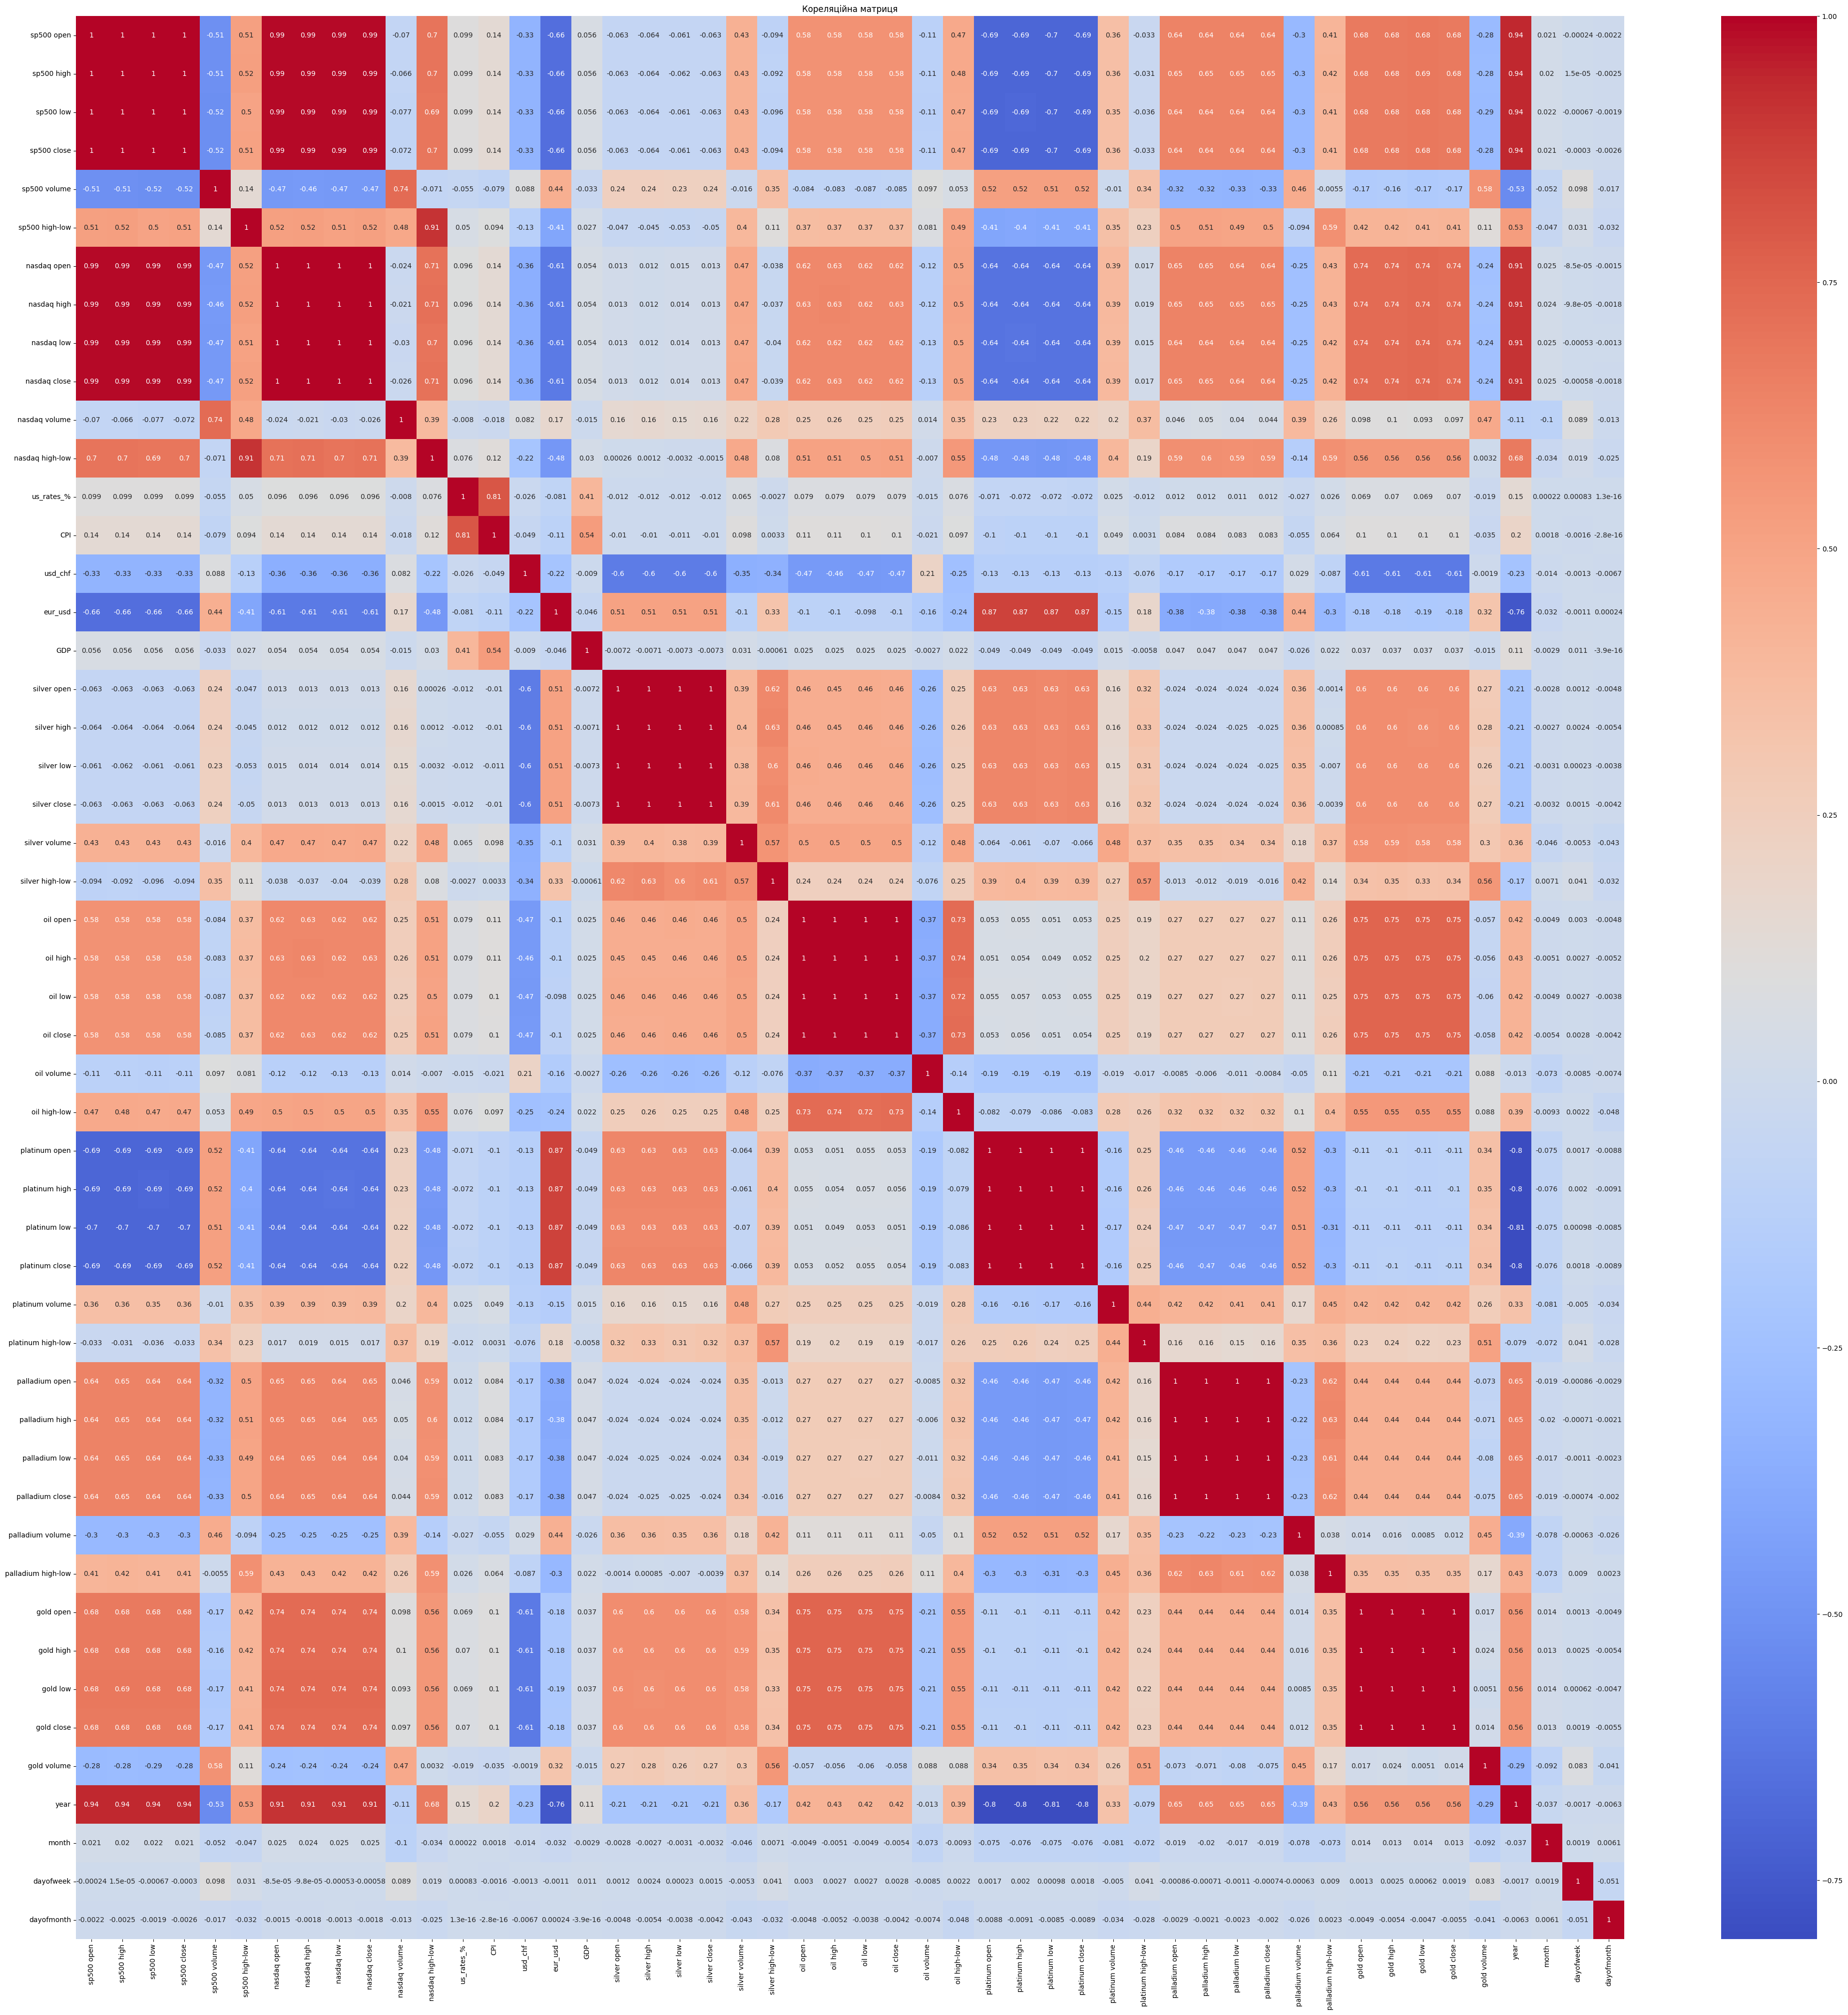

In [6]:
# Розраховуємо кореляційну матрицю
# Використовуємо numeric_only=True, щоб виключити нечислові стовпці
correlation_matrix = data.corr(numeric_only=True)

# Виводимо кореляційну матрицю
print("Кореляційна матриця:")
print(correlation_matrix)

# Візуалізуємо кореляційну матрицю у вигляді теплової карти
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

# Крок 3: Розподіл даних

У цій комірці ми розділимо дані на тренувальний і тестовий набори у співвідношенні 80:20.

*   **`train_test_split(data, test_size=0.2, random_state=42)`:**
    *   `data`: Набір даних, який потрібно розділити.
    *   `test_size=0.2`: Вказує, що 20% даних буде виділено для тестового набору.
    *   `random_state=42`: Забезпечує відтворюваність результатів. При кожному запуску коду з `random_state=42` дані будуть розділені однаково. Ви можете використовувати будь-яке ціле число.

*   Функція повертає чотири частини: `X_train`, `X_test`, `y_train`, `y_test`. Оскільки в даному випадку у нас немає окремої цільової змінної `y`, ми будемо використовувати тільки перші дві частини.

*   **Виведення розмірів:** Виводимо розміри отриманих наборів даних, щоб переконатися, що розподіл відбувся коректно.

In [7]:
# Розділяємо дані на тренувальний і тестовий набори (80:20)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Виводимо розміри отриманих наборів даних
print("Розмір тренувального набору:", train_data.shape)
print("Розмір тестового набору:", test_data.shape)

Розмір тренувального набору: (3123, 50)
Розмір тестового набору: (781, 50)


# Крок 4: Побудова моделі регресії

Тут побудуємо та навчимо модель лінійної регресії, використовуючи бібліотеку scikit-learn.

*   **`LinearRegression()`:** Створює об'єкт моделі лінійної регресії.
*   **`model.fit(X_train, y_train)`:** Навчає модель на тренувальних даних.
    *   `X_train`: Навчальний набір даних (всі стовпці, крім цільового, якщо він є).
    *   `y_train`: Цільова змінна для навчання (якщо є, інакше - теж `train_data`).
*   Оскільки ми навчаємо модель на всьому наборі даних без виділення окремої цільової змінної, ми передаємо `train_data` як `X_train` та `y_train`

**Зверніть увагу:** У цьому прикладі ми використовуємо всі доступні числові ознаки для навчання моделі. У реальних завданнях рекомендується проводити відбір ознак, щоб покращити якість моделі та уникнути перенавчання. Також ми навчимо модель одразу на всіх даних, не виділяючи окремо цільову змінну.

In [8]:
# Створюємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель на тренувальному наборі даних
model.fit(train_data, train_data)

# Виводимо коефіцієнти моделі
print("Коефіцієнти моделі:", model.coef_)

# Робимо пустий рядок для візуального розділення
print("\n")

# Виводимо зсув моделі
print("Зсув моделі:", model.intercept_)

Коефіцієнти моделі: [[ 1.00000000e+00 -7.95402841e-10 -5.85544711e-11 ... -2.80849281e-11
  -1.35966816e-10 -3.04751630e-11]
 [ 1.96921727e-09  6.66666666e-01  3.33333333e-01 ... -1.65889889e-11
  -7.99394613e-11 -1.79345844e-11]
 [ 2.92893432e-09  3.33333332e-01  6.66666666e-01 ... -3.85334858e-11
  -1.86438488e-10 -4.17690604e-11]
 ...
 [-1.03881365e-09  5.39641550e-10  4.33751739e-11 ...  1.00000000e+00
   9.28242960e-11  2.08054489e-11]
 [-1.14977784e-09  5.84367375e-10  6.09250222e-11 ...  2.12216528e-11
   1.00000000e+00  2.30279231e-11]
 [ 1.22647916e-07 -6.41170357e-08 -4.71693689e-09 ... -2.26374114e-09
  -1.09593207e-08  9.99999998e-01]]


Зсув моделі: [ 8.65156835e-10  4.34044978e-09 -1.88752551e-08 -1.11358077e-07
 -3.50177288e-06  2.25621797e-08  4.21115942e-09  2.99857561e-09
 -2.17673346e-09 -2.03849027e-09 -3.48687172e-06  1.04223172e-08
 -5.54794544e-09  8.97779273e-09  4.91939012e-09  8.86659879e-09
  1.09139364e-10  1.93624672e-09  3.60032111e-08  9.05756536e-09
  9.

# Крок 5: Оцінка моделі

У цій комірці ми оцінимо якість нашої лінійної регресійної моделі, використовуючи коефіцієнт детермінації (R^2) на тестовому наборі даних, а також візуалізуємо результати за допомогою scatter plot.

*   **`model.predict(test_data)`:** Використовує навчену модель для отримання прогнозів на тестовому наборі даних.
*   **`r2_score(test_data, y_pred)`:** Обчислює коефіцієнт детермінації (R^2) для оцінки якості моделі.
    *   `test_data`: Фактичні значення.
    *   `y_pred`: Передбачені моделлю значення.
*   **`plt.scatter(test_data['ім'я_змінної'], y_pred[:, індекс_змінної])`:** Будує scatter plot для візуалізації різниці між фактичними та передбаченими значеннями для конкретної змінної.
    *   Замість `'ім'я_змінної'` та `індекс_змінної` потрібно підставити відповідні значення.
*   **`plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red')`:** Додає на графік лінію ідеального прогнозу (діагональ) для порівняння.
*   **Інші інструкції `plt...`:** Налаштовують вигляд графіка (заголовки, підписи осей).

**Зверніть увагу:**

*   Ми генеруємо прогнози для всього тестового набору даних, що включає всі змінні.
*   Для побудови scatter plot потрібно вибрати конкретну змінну для відображення на осі X (фактичні значення) та відповідний їй стовпець з прогнозу (вісь Y).
*   Код для побудови scatter plot потрібно буде адаптувати, вказавши ім'я змінної та її індекс в масиві `y_pred`.

Коефіцієнт детермінації (R^2): 0.9999999999999999


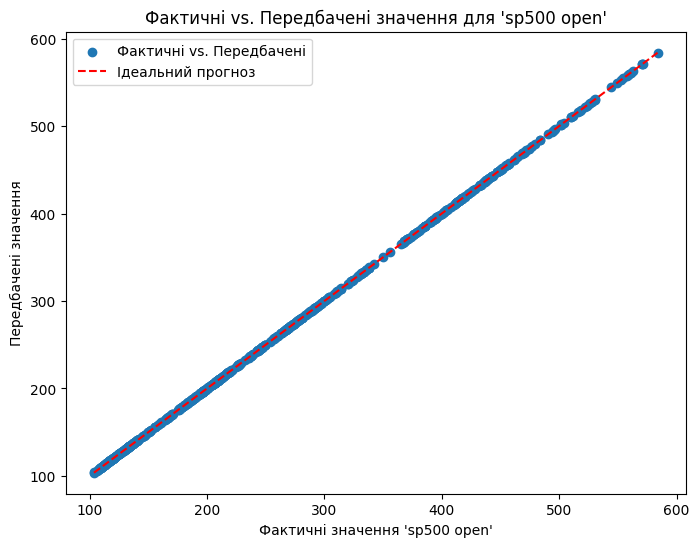

In [9]:
# Робимо передбачення на тестовому наборі даних
y_pred = model.predict(test_data)

# Оцінюємо модель, використовуючи R^2
r2 = r2_score(test_data, y_pred)
print(f"Коефіцієнт детермінації (R^2): {r2}")

# Побудова scatter plot для візуалізації
# Виберемо для прикладу першу змінну (замість індекс 0 підставте індекс іншої змінної, якщо потрібно)
variable_index = 0
plt.figure(figsize=(8, 6))
plt.scatter(test_data.iloc[:, variable_index], y_pred[:, variable_index], label="Фактичні vs. Передбачені") # Додано label
plt.xlabel(f"Фактичні значення '{test_data.columns[variable_index]}'")
plt.ylabel("Передбачені значення")
plt.title(f"Фактичні vs. Передбачені значення для '{test_data.columns[variable_index]}'")

# Додаємо лінію ідеального прогнозу
min_val = min(test_data.iloc[:, variable_index].min(), y_pred[:, variable_index].min())
max_val = max(test_data.iloc[:, variable_index].max(), y_pred[:, variable_index].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', label="Ідеальний прогноз") # Додано label

# Додаємо легенду
plt.legend()

plt.show()

# Крок 6: Додаткове завдання

Ми спробуємо покращити результати, застосувавши інші алгоритми регресії: Ridge, Lasso та Decision Tree.
Ми навчимо кожну модель на тренувальних даних, зробимо передбачення на тестових даних та оцінимо результати за допомогою R^2 та MSE. Також ми побудуємо графіки для порівняння моделей.

*   **`Ridge(alpha=1.0)`:** Створює об'єкт моделі Ridge регресії з коефіцієнтом регуляризації alpha=1.0.
*   **`Lasso(alpha=1.0)`:** Створює об'єкт моделі Lasso регресії з коефіцієнтом регуляризації alpha=1.0.
*   **`DecisionTreeRegressor(random_state=42)`:** Створює об'єкт моделі Decision Tree регресії. `random_state` фіксує випадковість для відтворюваності.
*   **`model.fit(X_train, y_train)`:** Навчає модель на тренувальних даних.
*   **`model.predict(X_test)`:** Робить передбачення на тестових даних.
*   **`r2_score(y_test, y_pred)`:** Обчислює R^2.
*   **`mean_squared_error(y_test, y_pred)`:** Обчислює MSE.
*   **Стовпчасті діаграми:** Будуються для візуального порівняння моделей за R^2 та MSE.

**Зверніть увагу:**

*   Ми використовуємо всі доступні ознаки для навчання моделей. У реальних завданнях рекомендується проводити відбір ознак.
*   Параметри моделей (наприклад, `alpha` для Ridge та Lasso) підібрані довільно. Для кращих результатів їх слід підбирати, використовуючи методи оптимізації (наприклад, Grid Search).

C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.80863e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.385e+03, tolerance: 4.424e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not

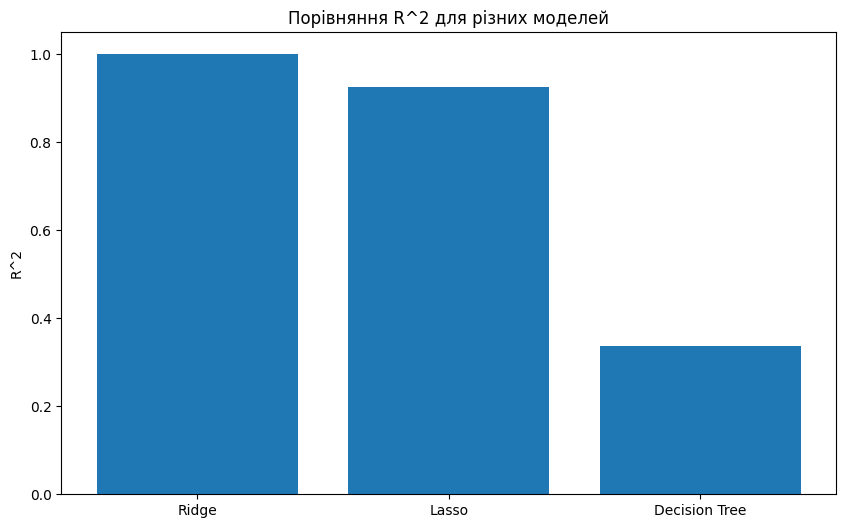

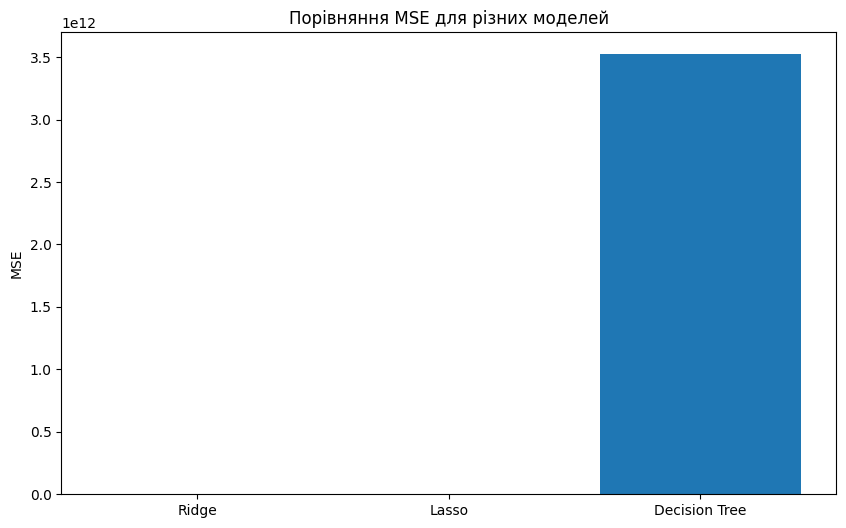

In [10]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ініціалізуємо моделі
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
tree_model = DecisionTreeRegressor(random_state=42)

# Навчаємо моделі
ridge_model.fit(train_data, train_data)
lasso_model.fit(train_data, train_data)
tree_model.fit(train_data, train_data)

# Робимо передбачення
ridge_pred = ridge_model.predict(test_data)
lasso_pred = lasso_model.predict(test_data)
tree_pred = tree_model.predict(test_data)

# Оцінюємо моделі
models = [('Ridge', ridge_pred), ('Lasso', lasso_pred), ('Decision Tree', tree_pred)]

results = []
for name, pred in models:
    r2 = r2_score(test_data, pred)
    mse = mean_squared_error(test_data, pred)
    results.append((name, r2, mse))

# Створюємо DataFrame для зручності
results_df = pd.DataFrame(results, columns=['Model', 'R^2', 'MSE'])

# Будуємо стовпчасту діаграму для порівняння R^2
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R^2'])
plt.ylabel('R^2')
plt.title('Порівняння R^2 для різних моделей')
plt.show()

# Будуємо стовпчасту діаграму для порівняння MSE
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MSE'])
plt.ylabel('MSE')
plt.title('Порівняння MSE для різних моделей')
plt.show()

### ***6.1. Відбір ознак***
Cпробуємо покращити результати, використовуючи методи відбору ознак.

**Важливість відбору ознак:**

Використання всіх доступних ознак не завжди є оптимальним рішенням. Деякі ознаки можуть бути неінформативними, корелювати між собою або навіть вносити шум, що може призвести до перенавчання моделі та погіршення її узагальнюючої здатності. Відбір ознак дозволяє:

*   **Покращити якість моделі:** Видалення неінформативних та надлишкових ознак може призвести до кращої продуктивності моделі.
*   **Зменшити час навчання:** Менша кількість ознак означає швидше навчання моделі.
*   **Спростити інтерпретацію:** Модель з меншою кількістю ознак легше інтерпретувати.
*   **Уникнути перенавчання:** Зменшення кількості ознак знижує ризик перенавчання, особливо коли даних мало.

**Методи відбору ознак:**

Існує багато методів відбору ознак, які можна умовно розділити на три групи:

1.  **Фільтри (Filter Methods):**
    *   Оцінюють кожну ознаку незалежно від моделі, використовуючи статистичні тести або метрики (наприклад, кореляція, взаємна інформація).
    *   Приклади: кореляція Пірсона, ANOVA, Chi-squared.
    *   Переваги: швидкі та прості в реалізації.
    *   Недоліки: не враховують взаємодію між ознаками та модель.

2.  **Обгортки (Wrapper Methods):**
    *   Використовують модель для оцінки різних комбінацій ознак.
    *   Приклади: Recursive Feature Elimination (RFE), Forward Selection, Backward Elimination.
    *   Переваги: враховують взаємодію між ознаками та моделлю.
    *   Недоліки: обчислювально дорогі.

3.  **Вбудовані (Embedded Methods):**
    *   Відбір ознак відбувається під час навчання моделі.
    *   Приклади: Lasso Regression, Ridge Regression, Decision Trees.
    *   Переваги: менш обчислювально дорогі, ніж обгортки, і враховують взаємодію між ознаками та моделлю.
    *   Недоліки: залежать від конкретної моделі.

**Що ми зробимо:**

У наступній комірці ми спробуємо застосувати деякі з цих методів (фільтри та вбудовані методи) до наших даних та порівняємо результати з моделлю, навченою на всіх ознаках.

**Зверніть увагу:** Вибір методу відбору ознак залежить від конкретного завдання та даних. Немає універсального методу, який би підходив для всіх випадків. Потрібно експериментувати та порівнювати результати.

**Важливість відбору ознак:**

Використання всіх доступних ознак не завжди є оптимальним рішенням. Деякі ознаки можуть бути неінформативними, корелювати між собою або навіть вносити шум, що може призвести до перенавчання моделі та погіршення її узагальнюючої здатності. Відбір ознак дозволяє:

*   **Покращити якість моделі:** Видалення неінформативних та надлишкових ознак може призвести до кращої продуктивності моделі.
*   **Зменшити час навчання:** Менша кількість ознак означає швидше навчання моделі.
*   **Спростити інтерпретацію:** Модель з меншою кількістю ознак легше інтерпретувати.
*   **Уникнути перенавчання:** Зменшення кількості ознак знижує ризик перенавчання, особливо коли даних мало.

**Методи відбору ознак, які ми використаємо:**

1.  **Кореляційний аналіз (фільтр):**
    *   Використаємо `SelectKBest` з `f_regression` для вибору `k` найкращих ознак на основі F-статистики.
    *   F-статистика оцінює лінійну залежність між кожною ознакою та цільовою змінною.
    *   Ми будемо ітеруватися по всіх стовпцях `train_data`, розглядаючи кожен як потенційну цільову змінну, і відбирати найкращі ознаки для кожної з них.
    *   Потім об'єднаємо всі відібрані ознаки, видалимо дублікати та відсортуємо.

2.  **Lasso регресія (вбудований метод):**
    *   Lasso регресія - це різновид лінійної регресії, яка використовує L1-регуляризацію.
    *   L1-регуляризація змушує деякі коефіцієнти моделі ставати нульовими, що автоматично призводить до відбору ознак.
    *   Ми застосуємо Lasso до масштабованих даних (`StandardScaler`) і відберемо ознаки з ненульовими коефіцієнтами.

**Навчання та оцінка:**

Після відбору ознак ми навчимо дві моделі лінійної регресії:

1.  На ознаках, відібраних за допомогою кореляційного аналізу.
2.  На ознаках, відібраних за допомогою Lasso.

Потім ми зробимо передбачення на тестових даних та оцінимо якість моделей за допомогою R^2 та MSE.

**Зверніть увагу:**

*   Вибір методу відбору ознак залежить від конкретного завдання та даних. Немає універсального методу, який би підходив для всіх випадків. Потрібно експериментувати та порівнювати результати.
*   В даному випадку ми використовуємо специфічний підхід до відбору ознак, враховуючи відсутність окремої цільової змінної.
*   Результати R^2 та MSE можуть бути не такими, як у випадку стандартної задачі регресії, і їх інтерпретація може вимагати додаткового аналізу.

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# 1. Відбір ознак на основі кореляції (фільтр)

# Вибираємо k найкращих ознак, використовуючи F-statistic
k = 15  # Змініть k на бажану кількість ознак

# Зберігаємо результати для кожної цільової змінної
all_selected_features_correlation = []

for target_column in train_data.columns:
    selector = SelectKBest(f_regression, k=min(k, train_data.shape[1] - 1))
    selector.fit(train_data.drop(target_column, axis=1), train_data[target_column])

    # Отримуємо маску відібраних ознак
    mask = selector.get_support()

    # Отримуємо імена відібраних ознак
    selected_features = train_data.drop(target_column, axis=1).columns[mask]
    all_selected_features_correlation.extend(selected_features)

# Видаляємо дублікати та сортуємо
selected_features_correlation = sorted(list(set(all_selected_features_correlation)))

print("Відібрані ознаки (кореляція):", selected_features_correlation)

# 2. Відбір ознак з використанням Lasso (вбудований метод)

# Спочатку масштабуємо дані
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Застосовуємо Lasso
lasso_model = Lasso(alpha=0.05)  # Змініть alpha за потреби
lasso_model.fit(train_data_scaled, train_data_scaled)

# Отримуємо коефіцієнти Lasso
lasso_coef = np.abs(lasso_model.coef_)

# Відбираємо ознаки з ненульовими коефіцієнтами
mask = lasso_coef.mean(axis=0) > 1e-10 
selected_features_lasso = train_data.columns[mask]

print("Відібрані ознаки (Lasso):", selected_features_lasso)

# 3. Навчання моделі на відібраних ознаках

# Створюємо нові набори даних з відібраними ознаками на основі кореляційного відбору
train_data_selected_corr = train_data[selected_features_correlation]
test_data_selected_corr = test_data[selected_features_correlation]

# Створюємо нові набори даних з відібраними ознаками на основі Lasso
train_data_selected_lasso = train_data[selected_features_lasso]
test_data_selected_lasso = test_data[selected_features_lasso]

# Навчаємо лінійну регресію на ознаках, відібраних кореляцією
model_corr = LinearRegression()
model_corr.fit(train_data_selected_corr, train_data_selected_corr)

# Навчаємо лінійну регресію на ознаках, відібраних Lasso
model_lasso = LinearRegression()
model_lasso.fit(train_data_selected_lasso, train_data_selected_lasso)

# Робимо передбачення та оцінюємо R^2 та MSE
# Для моделі з ознаками, відібраними кореляцією
pred_corr = model_corr.predict(test_data_selected_corr)
r2_corr = r2_score(test_data_selected_corr, pred_corr)
mse_corr = mean_squared_error(test_data_selected_corr, pred_corr)
print(f"R^2 (кореляція): {r2_corr:.4f}, MSE (кореляція): {mse_corr:.4f}")

# Для моделі з ознаками, відібраними Lasso
pred_lasso = model_lasso.predict(test_data_selected_lasso)
r2_lasso = r2_score(test_data_selected_lasso, pred_lasso)
mse_lasso = mean_squared_error(test_data_selected_lasso, pred_lasso)
print(f"R^2 (Lasso): {r2_lasso:.4f}, MSE (Lasso): {mse_lasso:.4f}")

Відібрані ознаки (кореляція): ['CPI', 'GDP', 'dayofmonth', 'dayofweek', 'eur_usd', 'gold close', 'gold high', 'gold low', 'gold open', 'gold volume', 'month', 'nasdaq close', 'nasdaq high', 'nasdaq high-low', 'nasdaq low', 'nasdaq open', 'nasdaq volume', 'oil close', 'oil high', 'oil high-low', 'oil low', 'oil open', 'oil volume', 'palladium close', 'palladium high', 'palladium high-low', 'palladium low', 'palladium open', 'palladium volume', 'platinum close', 'platinum high', 'platinum high-low', 'platinum low', 'platinum open', 'platinum volume', 'silver close', 'silver high', 'silver high-low', 'silver low', 'silver open', 'silver volume', 'sp500 close', 'sp500 high', 'sp500 high-low', 'sp500 low', 'sp500 open', 'sp500 volume', 'us_rates_%', 'usd_chf', 'year']


C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.467e-01, tolerance: 3.123e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.238e-01, tolerance: 3.123e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

Відібрані ознаки (Lasso): Index(['sp500 open', 'sp500 high', 'sp500 low', 'sp500 close', 'sp500 volume',
       'sp500 high-low', 'nasdaq open', 'nasdaq high', 'nasdaq low',
       'nasdaq close', 'nasdaq volume', 'nasdaq high-low', 'us_rates_%', 'CPI',
       'usd_chf', 'eur_usd', 'GDP', 'silver open', 'silver high', 'silver low',
       'silver close', 'silver volume', 'silver high-low', 'oil open',
       'oil high', 'oil low', 'oil close', 'oil volume', 'oil high-low',
       'platinum open', 'platinum high', 'platinum low', 'platinum close',
       'platinum volume', 'platinum high-low', 'palladium open',
       'palladium high', 'palladium low', 'palladium close',
       'palladium volume', 'palladium high-low', 'gold open', 'gold high',
       'gold low', 'gold close', 'gold volume', 'year', 'month', 'dayofweek',
       'dayofmonth'],
      dtype='object')
R^2 (кореляція): 1.0000, MSE (кореляція): 0.0000
R^2 (Lasso): 1.0000, MSE (Lasso): 0.0000


C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.715e-01, tolerance: 3.123e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.144e-01, tolerance: 3.123e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

# ***Крок 6.2: Підбір гіперпараметрів (Grid Search) та порівняння моделей***

У цій комірці ми оптимізуємо гіперпараметри для моделей Ridge, Lasso та Decision Tree, використовуючи Grid Search, і порівняємо їх результати.

**Гіперпараметри та Grid Search:**

*   **Гіперпараметри** - це параметри моделі, які не навчаються на даних, а задаються перед навчанням.
*   **Grid Search** - це метод оптимізації, який дозволяє знайти найкращі значення гіперпараметрів шляхом перебору всіх можливих комбінацій значень з заданого набору (сітки).

**Що ми зробимо:**

1.  **Визначимо сітки гіперпараметрів:** Для кожної моделі (Ridge, Lasso, Decision Tree) ми створимо словник, де ключі - це назви гіперпараметрів, а значення - списки можливих значень.
2.  **Використаємо `GridSearchCV`:** Цей клас з бібліотеки `sklearn.model_selection` автоматично перебирає всі комбінації гіперпараметрів, навчає моделі з цими параметрами, оцінює їх якість, використовуючи крос-валідацію, та вибирає найкращу комбінацію.
3.  **Навчимо моделі з оптимальними гіперпараметрами:** Отримавши найкращі значення гіперпараметрів, ми ще раз навчимо моделі Ridge, Lasso та Decision Tree, використовуючи ці значення.
4.  **Оцінимо результати:** Зробимо передбачення на тестових даних та оцінимо якість моделей за допомогою R^2 та MSE.
5. **Порівняємо моделі:** Побудуємо стовпчасті діаграми для візуального порівняння R^2 та MSE оптимізованих моделей Ridge, Lasso та Decision Tree.

**Зверніть увагу:**

*   Grid Search може бути обчислювально дорогим, особливо якщо сітка гіперпараметрів велика.
*   В даному випадку ми використовуємо спрощену сітку для демонстрації. У реальних завданнях рекомендується використовувати більш широкі сітки та ретельніше підходити до вибору діапазонів значень.
*   Ми будемо використовувати `train_data` та `test_data`, які були попередньо відібрані за допомогою Lasso регресії.

C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.37687e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.45998e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.67251e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\uwav9\AppD

Найкращі параметри для Ridge: {'alpha': 0.001}
Найкращі параметри для Lasso: {'alpha': 0.001}
Ridge R^2: 1.0000, MSE: 0.0000
Lasso R^2: 0.9921, MSE: 2829675.9738


C:\Users\uwav9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.628e+02, tolerance: 2.619e+02
  model = cd_fast.enet_coordinate_descent(


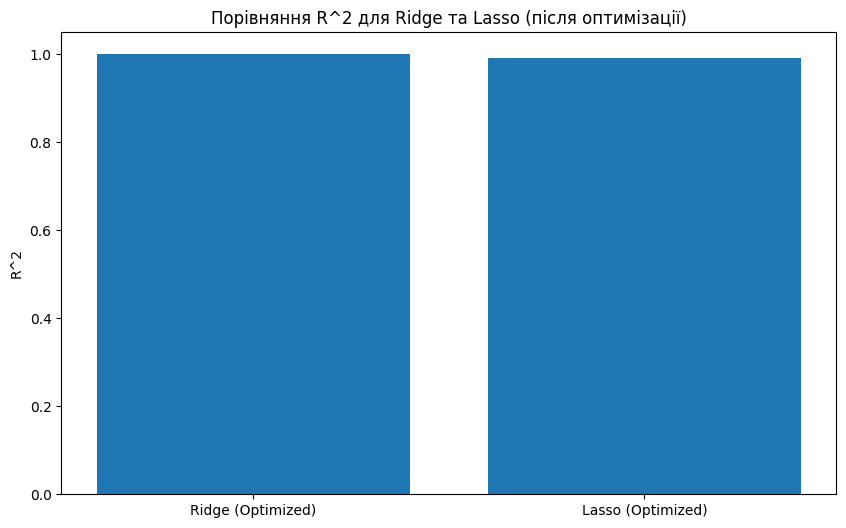

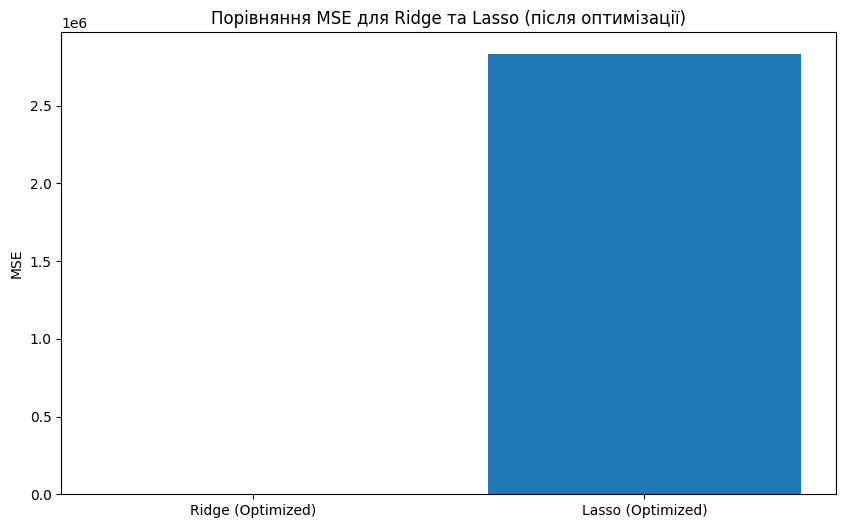

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Використовуємо ознаки, відібрані за допомогою Lasso
X_train = train_data_selected_lasso
X_test = test_data_selected_lasso

# Сітка гіперпараметрів для Ridge
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Сітка гіперпараметрів для Lasso
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Сітка гіперпараметрів для Decision Tree
param_grid_tree = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Ridge регресія з Grid Search
ridge_model = Ridge()
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, X_train)

# Lasso регресія з Grid Search
lasso_model = Lasso()
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(X_train, X_train)

# Decision Tree з Grid Search
tree_model = DecisionTreeRegressor(random_state=42)
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='r2')
grid_search_tree.fit(X_train, X_train)

# Вивід найкращих параметрів
print("Найкращі параметри для Ridge:", grid_search_ridge.best_params_)
print("Найкращі параметри для Lasso:", grid_search_lasso.best_params_)
print("Найкращі параметри для Decision Tree:", grid_search_tree.best_params_)

# Навчання моделей з оптимальними гіперпараметрами
best_ridge_model = grid_search_ridge.best_estimator_
best_lasso_model = grid_search_lasso.best_estimator_
best_tree_model = grid_search_tree.best_estimator_

# Передбачення на тестових даних
y_pred_ridge = best_ridge_model.predict(X_test)
y_pred_lasso = best_lasso_model.predict(X_test)
y_pred_tree = best_tree_model.predict(X_test)

# Оцінка результатів
r2_ridge = r2_score(X_test, y_pred_ridge)
mse_ridge = mean_squared_error(X_test, y_pred_ridge)

r2_lasso = r2_score(X_test, y_pred_lasso)
mse_lasso = mean_squared_error(X_test, y_pred_lasso)

r2_tree = r2_score(X_test, y_pred_tree)
mse_tree = mean_squared_error(X_test, y_pred_tree)

print(f"Ridge R^2: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}")
print(f"Lasso R^2: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}")
print(f"Decision Tree R^2: {r2_tree:.4f}, MSE: {mse_tree:.4f}")

# Порівняння результатів

# Створюємо список з результатами
results = [
    ('Ridge (Optimized)', y_pred_ridge, r2_ridge, mse_ridge),
    ('Lasso (Optimized)', y_pred_lasso, r2_lasso, mse_lasso),
    ('Decision Tree (Optimized)', y_pred_tree, r2_tree, mse_tree)
]

# Створюємо DataFrame для зручності
results_df = pd.DataFrame(results, columns=['Model', 'Predictions', 'R^2', 'MSE'])

# Будуємо стовпчасту діаграму для порівняння R^2
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R^2'])
plt.ylabel('R^2')
plt.title('Порівняння R^2 для Ridge, Lasso та Decision Tree (після оптимізації)')
plt.show()

# Будуємо стовпчасту діаграму для порівняння MSE
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MSE'])
plt.ylabel('MSE')
plt.title('Порівняння MSE для Ridge, Lasso та Decision Tree (після оптимізації)')
plt.show()